Thank You KGPTalkie for the lesson

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('/content/drive/My Drive/dataset/GOOG/GOOG .csv', date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [7]:
data_train = data[data['Date']<'2019-01-01'].copy()
data_train.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3607,2018-12-17,1037.510010,1053.150024,1007.900024,1016.530029,1016.530029,2385400
3608,2018-12-18,1026.089966,1049.479980,1021.440002,1028.709961,1028.709961,2192500
3609,2018-12-19,1033.989990,1062.000000,1008.049988,1023.010010,1023.010010,2479300
3610,2018-12-20,1018.130005,1034.219971,996.359985,1009.409973,1009.409973,2673500
3611,2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800
3616,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [8]:
data_test = data[data['Date']>='2019-01-01'].copy()
data_test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
3622,2019-01-09,1081.650024,1082.630005,1066.400024,1074.660034,1074.660034,1199300
3623,2019-01-10,1067.660034,1071.150024,1057.709961,1070.329956,1070.329956,1456400
3624,2019-01-11,1063.180054,1063.775024,1048.479980,1057.189941,1057.189941,1520800
3625,2019-01-14,1046.920044,1051.530029,1041.255005,1044.689941,1044.689941,1144300
3626,2019-01-15,1050.170044,1080.050049,1047.339966,1077.150024,1077.150024,1463600


In [9]:
training_data = data_train.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [0]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape, y_train.shape

((3557, 60, 5), (3557,))

###Building LSTM

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [0]:
regression = Sequential()

regression.add(LSTM(units = 60, activation='relu', return_sequences=True, input_shape= (X_train.shape[1], 5)))
regression.add(Dropout(0.20))

regression.add(LSTM(units = 60, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 80, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 120, activation='relu'))
regression.add(Dropout(0.2))

regression.add(Dense(units = 1))

In [41]:
regression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [0]:
regression.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
regression.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
112/112 [==============================] - 17s 153ms/step - loss: 0.0108
Epoch 2/50
112/112 [==============================] - 17s 156ms/step - loss: 0.0019
Epoch 3/50
112/112 [==============================] - 18s 157ms/step - loss: 0.0017
Epoch 4/50
112/112 [==============================] - 17s 156ms/step - loss: 0.0016
Epoch 5/50
112/112 [==============================] - 17s 156ms/step - loss: 0.0015
Epoch 6/50
112/112 [==============================] - 18s 158ms/step - loss: 0.0016
Epoch 7/50
112/112 [==============================] - 18s 157ms/step - loss: 0.0013
Epoch 8/50
112/112 [==============================] - 17s 156ms/step - loss: 0.0013
Epoch 9/50
112/112 [==============================] - 18s 156ms/step - loss: 0.0014
Epoch 10/50
112/112 [==============================] - 18s 156ms/step - loss: 0.0014
Epoch 11/50
112/112 [==============================] - 18s 157ms/step - loss: 0.0013
Epoch 12/50
112/112 [==============================] - 17s 156ms/step - lo

##Prepare Test Data Set

In [44]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [45]:
data_train.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [0]:
past_60_days = data_train.tail(60)

In [0]:
df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(['Date','Adj Close'], axis=1)

In [48]:
df

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700
...,...,...,...,...,...
373,1147.300049,1175.310059,1138.140015,1162.810059,2486400
374,1122.000000,1129.689941,1097.449951,1105.619995,2344200
375,1098.260010,1126.859985,1096.400024,1120.839966,1964900
376,1119.015015,1123.540039,1079.810059,1097.880005,2313400


In [0]:
inputs = scaler.transform(df)

In [0]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])

In [51]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((318, 60, 5), (318,))

In [0]:
y_pred = regression.predict(X_test)

In [53]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [54]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [0]:
y_pred = y_pred*scale
y_test = y_test*scale

##Visualization

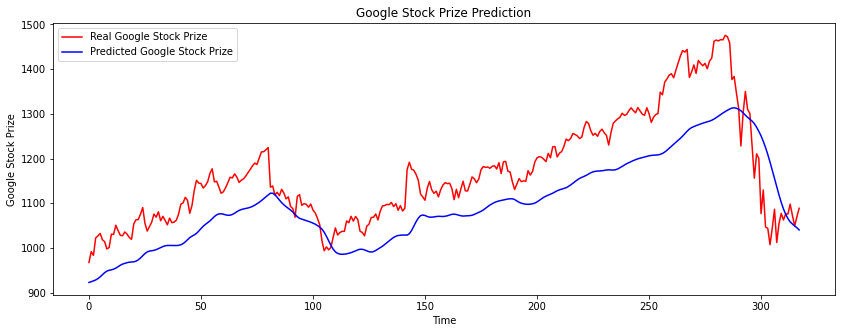

In [56]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Prize')
plt.plot(y_pred, color='blue', label = 'Predicted Google Stock Prize')
plt.title('Google Stock Prize Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prize')
plt.legend()
plt.show()